# &#x2B50; Linear Regression, Assignment-03, Part-01

<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

# Importing Libraries

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from matplotlib import pyplot as plt

# Preprocessing of data 

 - Opening csv file
 - filling nan values with mean of the column
 - storing Y (Result) column in list and dropping the Y column from our main dataframe
 - doing hot encoding (using pandas dummy)
 - Merging the dummy dataframe with main dataframe
 - Removing the column in which hot encoding was performed (Here Hour Column)
 - Splitting the dataframe in training and testing dataset (108 rows are for training, last 27 rows are for testing the model.)

In [21]:
openFiles=pd.read_csv("Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv")

In [22]:
x=[i for i in openFiles]
x[0]="Hour"
AVG=openFiles[x[-1]].mean()
openFiles=openFiles.replace(to_replace = np.nan, value =AVG) 
openFiles.columns=x
resultColumn=list(openFiles[x[-1]])
openFiles=openFiles.drop(x[-1],axis=1)
dummy=pd.get_dummies(openFiles.Hour)
merge=pd.concat([openFiles,dummy],axis=1)
openFiles=merge.drop("Hour",axis=1)
openFiles,test= openFiles.head(108),openFiles.tail(27)
#openFiles
print("○ There are {} rows and {} columns in testing dataframe".format(openFiles.shape[0],openFiles.shape[1]))

○ There are 108 rows and 20 columns in testing dataframe


# Normalization
- Making all columns value between 0 to 1 by using MinMaxScaler Normalization method
- Intuition for normalization
  - **value**=$\frac{Max(Column)-value}{Max(Column)-Min(Column)}$

In [23]:
minmax = MinMaxScaler()
openFiles[[i for i in openFiles]] = minmax.fit_transform(openFiles[[i for i in openFiles]])
#openFiles

# Removal of feature(s)
- Features that has mean less than 0.2 were removed
- Initializing Theta {$\theta$₀,$\theta$₁,..,$\theta$ₙ} to zero
- $\theta$₀ adds bias to the model while $\theta$₁,..,$\theta$ₙ gives translation to the predicted line.

In [24]:
theta0=0
theta={}
counter=1
reduced=0
for i in openFiles:
    if openFiles[i].mean()<=0.2:
        openFiles=openFiles.drop(i,axis=1)
        counter+=1
    else:
        theta[i]=0
        reduced+=1
       
        
#openFiles
print("○ There are {} rows and {} columns in reduced testing dataframe".format(openFiles.shape[0],openFiles.shape[1]))
print("○ Total {} column(s) deleted".format(counter))
print("○ Total {} column(s) left in the resulted dataframe".format(reduced))

○ There are 108 rows and 3 columns in reduced testing dataframe
○ Total 18 column(s) deleted
○ Total 3 column(s) left in the resulted dataframe


# Training the Model

- Learning rate {$\alpha$} has been set to 0.001 based on many hit and trial basis.
- Learning rate will govern the steps made during the gradient descent
- Epoch (No. of times the model has been runned) is set to 119 based on hit and trial basis.
- For detailed idea about linear regression formulae and how this code is formulated read the following [article]("https://machinelearningmastery.com/linear-regression-tutorial-using-gradient-descent-for-machine-learning/")

In [25]:
learningRate=0.001
rows=openFiles.shape[0]
# Epoch=119
for _ in range(119):
    for i in range(rows):
        value=0
        value+=theta0*1
        for j in openFiles:
            value+=theta[j]*list(openFiles[j])[i]

        error=value-resultColumn[i]
        theta0=theta0-learningRate*(error)*1

        for k in theta:
            theta[k]=theta[k]-learningRate*(error)*list(openFiles[k])[i]

# Printing value for 𝜃            
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
print("○ Value for the bias    𝜃0".translate(SUB),"--> {}".format(theta0))
counter=1
for i in theta:
    print("○ Value for the feature 𝜃{}".format(counter).translate(SUB),"--> {}".format(theta[i]))
    counter+=1
        

○ Value for the bias    𝜃₀ --> 3.6166980865196114
○ Value for the feature 𝜃₁ --> -0.08818114520368031
○ Value for the feature 𝜃₂ --> 1.2199513378295899
○ Value for the feature 𝜃₃ --> 1.1252458600330375


# Calculating MSE error 
- Printing predicted , actual value
- Formulae to calculate **MSE**=$\frac{\sum_{i=1}^{n} {(Y_i-Y)^2}}{n}$ (Where Yᵢ is predicted value and Y is actual value, n is total number of testing data)


In [26]:
error=0
predicted=[]
actual=[]
for i in range(27):
    value=0
    value+=theta0*1
    for j in theta:
        value+=theta[j]*list(test[j])[i]
    error+=pow(value-resultColumn[108+i],2)
    predicted.append(value)
    actual.append(resultColumn[108+i])
    print("○ Predicted Value: ","{0:.4f}".format(value),"| Actual Value: ","{0:.4f}".format(resultColumn[108+i]))


○ Predicted Value:  4.5721 | Actual Value:  4.0000
○ Predicted Value:  4.3957 | Actual Value:  4.7541
○ Predicted Value:  4.3957 | Actual Value:  5.0000
○ Predicted Value:  4.2129 | Actual Value:  4.0000
○ Predicted Value:  4.1312 | Actual Value:  2.0000
○ Predicted Value:  2.8231 | Actual Value:  4.7541
○ Predicted Value:  3.9548 | Actual Value:  1.0000
○ Predicted Value:  3.9548 | Actual Value:  3.0000
○ Predicted Value:  3.9548 | Actual Value:  9.0000
○ Predicted Value:  3.7785 | Actual Value:  3.0000
○ Predicted Value:  3.8667 | Actual Value:  9.0000
○ Predicted Value:  2.7349 | Actual Value:  3.0000
○ Predicted Value:  3.8667 | Actual Value:  4.7541
○ Predicted Value:  4.0430 | Actual Value:  7.0000
○ Predicted Value:  3.8601 | Actual Value:  3.0000
○ Predicted Value:  3.9548 | Actual Value:  9.0000
○ Predicted Value:  4.1312 | Actual Value:  9.0000
○ Predicted Value:  2.8231 | Actual Value:  4.0000
○ Predicted Value:  3.8667 | Actual Value:  3.0000
○ Predicted Value:  3.6903 | Ac

In [27]:
error=error/27
print("○ MSE Error-->","{0:.4f}".format(error))

○ MSE Error--> 7.0412


# Plotting the Graph
- Curve trying to fit with the most of the actual value

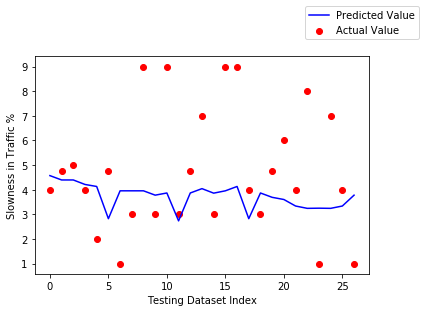

In [28]:
assume=[i for i in range(27)]
plt.scatter(assume,actual,c='r',label="Actual Value")
plt.plot(assume, predicted, color = 'blue',label="Predicted Value")
plt.ylabel("Slowness in Traffic %")
plt.xlabel("Testing Dataset Index")
plt.legend(loc=1,borderaxespad=-5)
plt.show()